In [31]:
import pandas as pd
import seaborn as sns

#Using a custom dataset that focuses on statistically significant variables
data = pd.read_csv("Documents/ufc_master_custom_vers1.csv")

#Switch Winner column to binary values
data['Winner'].replace(['Red','Blue'],[1,0], inplace=True)

#Drop missing values
data = data.dropna()

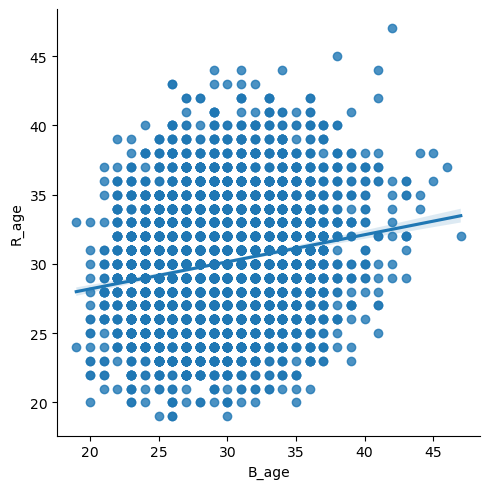

In [9]:
sns.lmplot(x='B_age',y='R_age',data=data)

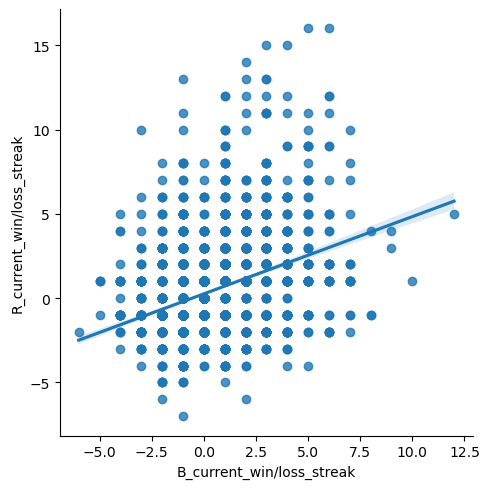

In [10]:
sns.lmplot(x='B_current_win/loss_streak',y='R_current_win/loss_streak',data=data)

In [18]:
all_ages = data['R_age'].append(data['B_age'])

print(all_ages.head())

print(all_ages.tail())

print(min(all_ages))
print(max(all_ages))

0    37
1    33
2    34
3    29
4    28
dtype: int64
4891    25
4892    29
4893    27
4894    34
4895    34
dtype: int64
19
47


C:\Users\OR0282379\AppData\Local\Temp\ipykernel_8940\3713586328.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_ages = data['R_age'].append(data['B_age'])


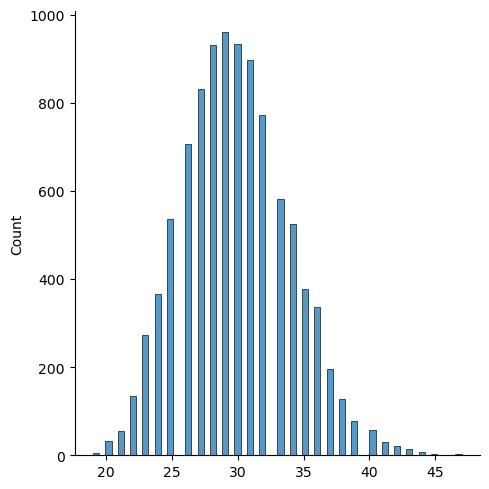

In [17]:
sns.displot(all_ages)

In [45]:
win_probability_by_age = []
count_by_age = []
age_range = [i for i in range(19,48)]

for i in age_range:
    
    winner_count = (data['Winner'].where(data['Winner'] == 0).where(data['B_age'] == i).count() + data['Winner'].where(data['Winner'] == 1).where(data['R_age'] == i).count())
    total_count = (data['Winner'].where(data['B_age'] == i).count() + data['Winner'].where(data['R_age'] == i).count())
    win_probability = winner_count / total_count
    fighter_count = all_ages.value_counts()[i]
    
    count_by_age.append(fighter_count)
    win_probability_by_age.append(win_probability)
    
    
print(win_probability_by_age)
print(count_by_age)
print(age_range)

[0.6666666666666666, 0.6060606060606061, 0.5535714285714286, 0.5895522388059702, 0.575091575091575, 0.5437158469945356, 0.5512104283054003, 0.5388967468175389, 0.5564903846153846, 0.5172043010752688, 0.50625, 0.5, 0.47714604236343366, 0.48638132295719844, 0.4725085910652921, 0.44274809160305345, 0.4365079365079365, 0.4523809523809524, 0.4, 0.3515625, 0.44871794871794873, 0.40350877192982454, 0.45161290322580644, 0.2857142857142857, 0.13333333333333333, 0.14285714285714285, 0.3333333333333333, 0.0, 0.5]
[6, 33, 56, 134, 273, 366, 537, 707, 832, 930, 960, 932, 897, 771, 582, 524, 378, 336, 195, 128, 78, 57, 31, 21, 15, 7, 3, 1, 2]
[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]


In [140]:
age_data = pd.DataFrame({'Age':age_range, 'Win Probability':win_probability_by_age, 'Fighter Count':count_by_age})
age_data['Win Probability'] = age_data['Win Probability'].round(decimals = 2)

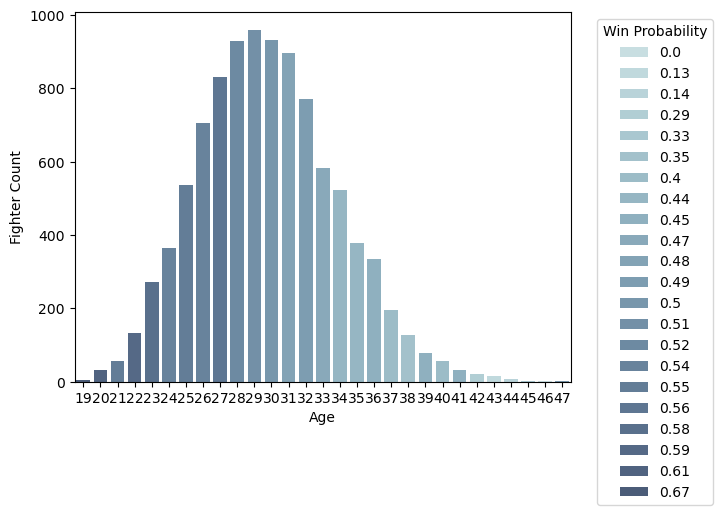

In [144]:
import matplotlib.pylab as plt

color_map = sns.cubehelix_palette(n_colors = 30, rot=-.2, as_cmap=False)

g = sns.barplot(x='Age', y='Fighter Count', data=age_data, hue = 'Win Probability', palette = color_map, dodge=False)

# change the legends location
g.legend(bbox_to_anchor= (1.3,1), title = 'Win Probability')

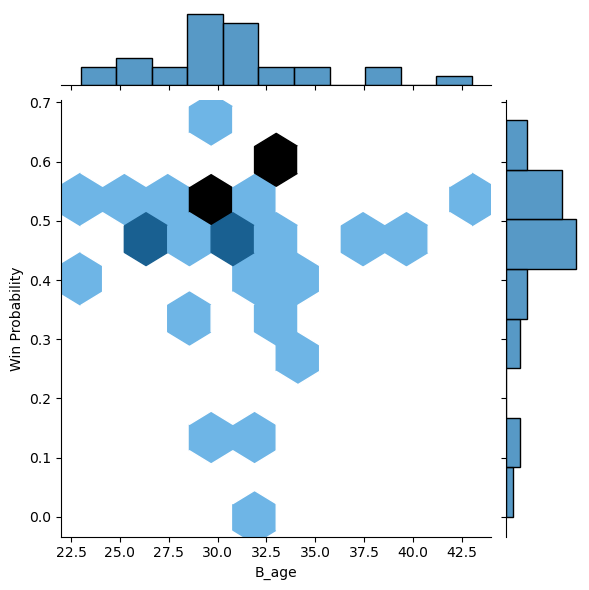

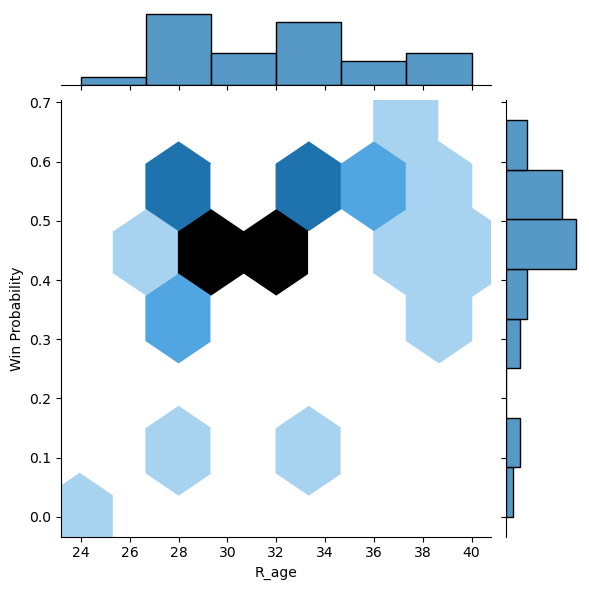

In [149]:
sns.jointplot(x = data['B_age'], y = age_data['Win Probability'],kind = 'hex')
sns.jointplot(x = data['R_age'], y = age_data['Win Probability'],kind = 'hex')